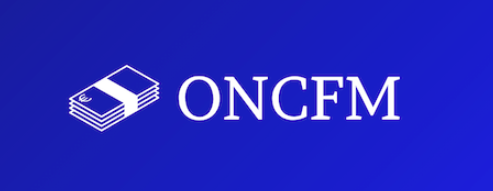

## Librairies de calcul

In [1]:
# Librairies de calcul
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# import de models
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#importer les packages de clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Suppréssion des avertissements
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importation des fichiers

#### Fichier de démonstration finale

In [2]:
# import du fichier de démonstration finale
billets_pro = pd.read_csv("billets_production.csv")
billets_pro.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


### Fichier de travail

In [3]:
# import du fichier
billets = pd.read_csv("billets.csv", sep=';')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Importation des données

Nous disposons actuellement de six informations géométriques sur un billet :

- length : la longueur du billet (en mm)  
- height_left : la hauteur du billet (mesurée sur le côté gauche, en mm)   
- height_right : la hauteur du billet (mesurée sur le côté droit, en mm)   
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm)  
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm)   
- diagonal : la diagonale du billet (en mm)

In [4]:
# import du fichier avec séparateur de colonnes 
billets = pd.read_csv("billets.csv", sep = ';')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
# Voir les statistiques diverses du dataFrame 
billets.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


La colonne `margin_low` ne contient pas le meme nombre d'éléments.

In [6]:
# Obtenir les détails essentiels sur notre dataFrame
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
# Obtenir le nombre de lignes et le nombre de colonnes
billets.shape

(1500, 7)

Le nombre de ligne est 1500, excepté `margin_low` qui manque 37 éléments.

### Vérification des valeurs manquantes 

In [8]:
# Vérification des doublons dans toutes les colonnes
billets.duplicated().sum()

0

In [9]:
# Vérification des valeurs manquantes
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

La colonne `margin_low` comprend 37 éléments manquants.

In [10]:
# Vérufucation d'un value count sur 'is_genuine'
billets.value_counts()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length
False       171.04    104.23       104.22        4.87        3.56       111.54    1
True        171.99    103.97       103.89        4.22        3.17       113.12    1
                      103.90       104.21        4.18        3.07       113.01    1
                      103.79       103.90        4.62        2.90       112.92    1
                      103.75       104.14        4.19        2.82       112.83    1
                                                                                 ..
False       172.55    104.25       104.23        5.60        3.13       111.72    1
            172.52    104.48       104.17        5.16        3.39       110.71    1
                      104.11       104.35        5.30        3.31       111.55    1
            172.51    104.43       104.17        5.11        3.08       111.70    1
True        172.92    103.55       103.94        4.78        3.27       113.55   

value count permet de lister les valeurs différentes de la colonne pour laquelle on a groupé les éléments et indique également le nombre d'occurrences de chaque élément.

In [11]:
# Calcul de correlations
billets.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


Text(0.5, 1.0, 'corrélations des variables')

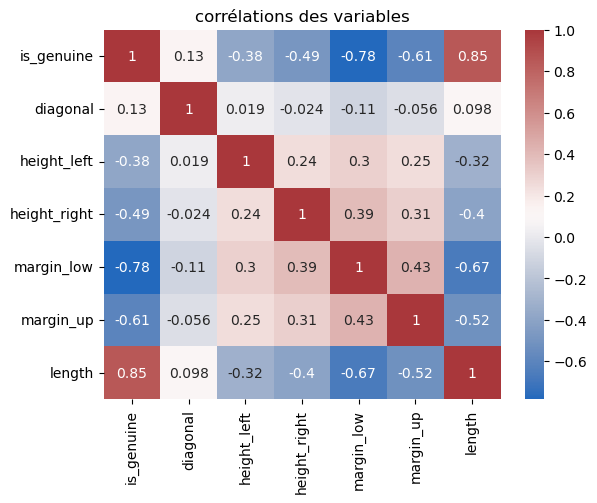

In [12]:
# Heatmap de correlations pour plus de lisibilité

sns.heatmap(billets.corr(), cmap="vlag", annot=True).set_title('corrélations des variables')

## Vérification des corrélation entre les variables

- is_genuine est trés fortement corrélé à `Lenght`.  
- is_genuine est trés fortement négativement corrélé à `magin_low`

## Comparaison de la taille des billets (Boxplot)

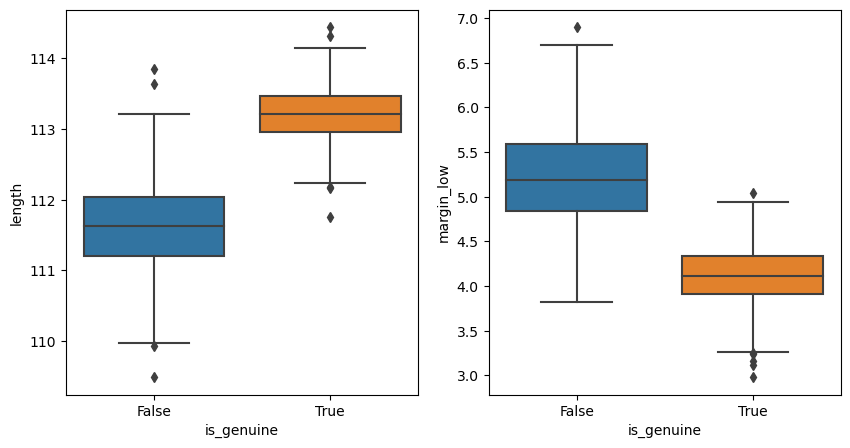

In [13]:
# box plot sur df billets
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x="is_genuine", y="length", data=billets,ax=ax[0])
sns.boxplot(x='is_genuine', y='margin_low',data=billets, ax=ax[1])

plt.show()

- Les vrais billets semblent etre plus long (`Lenght`).  
- Les faux billets ont une marge inférieures plus longues (`margin_low`).

## Corrélation par type de billet (Pairplot)

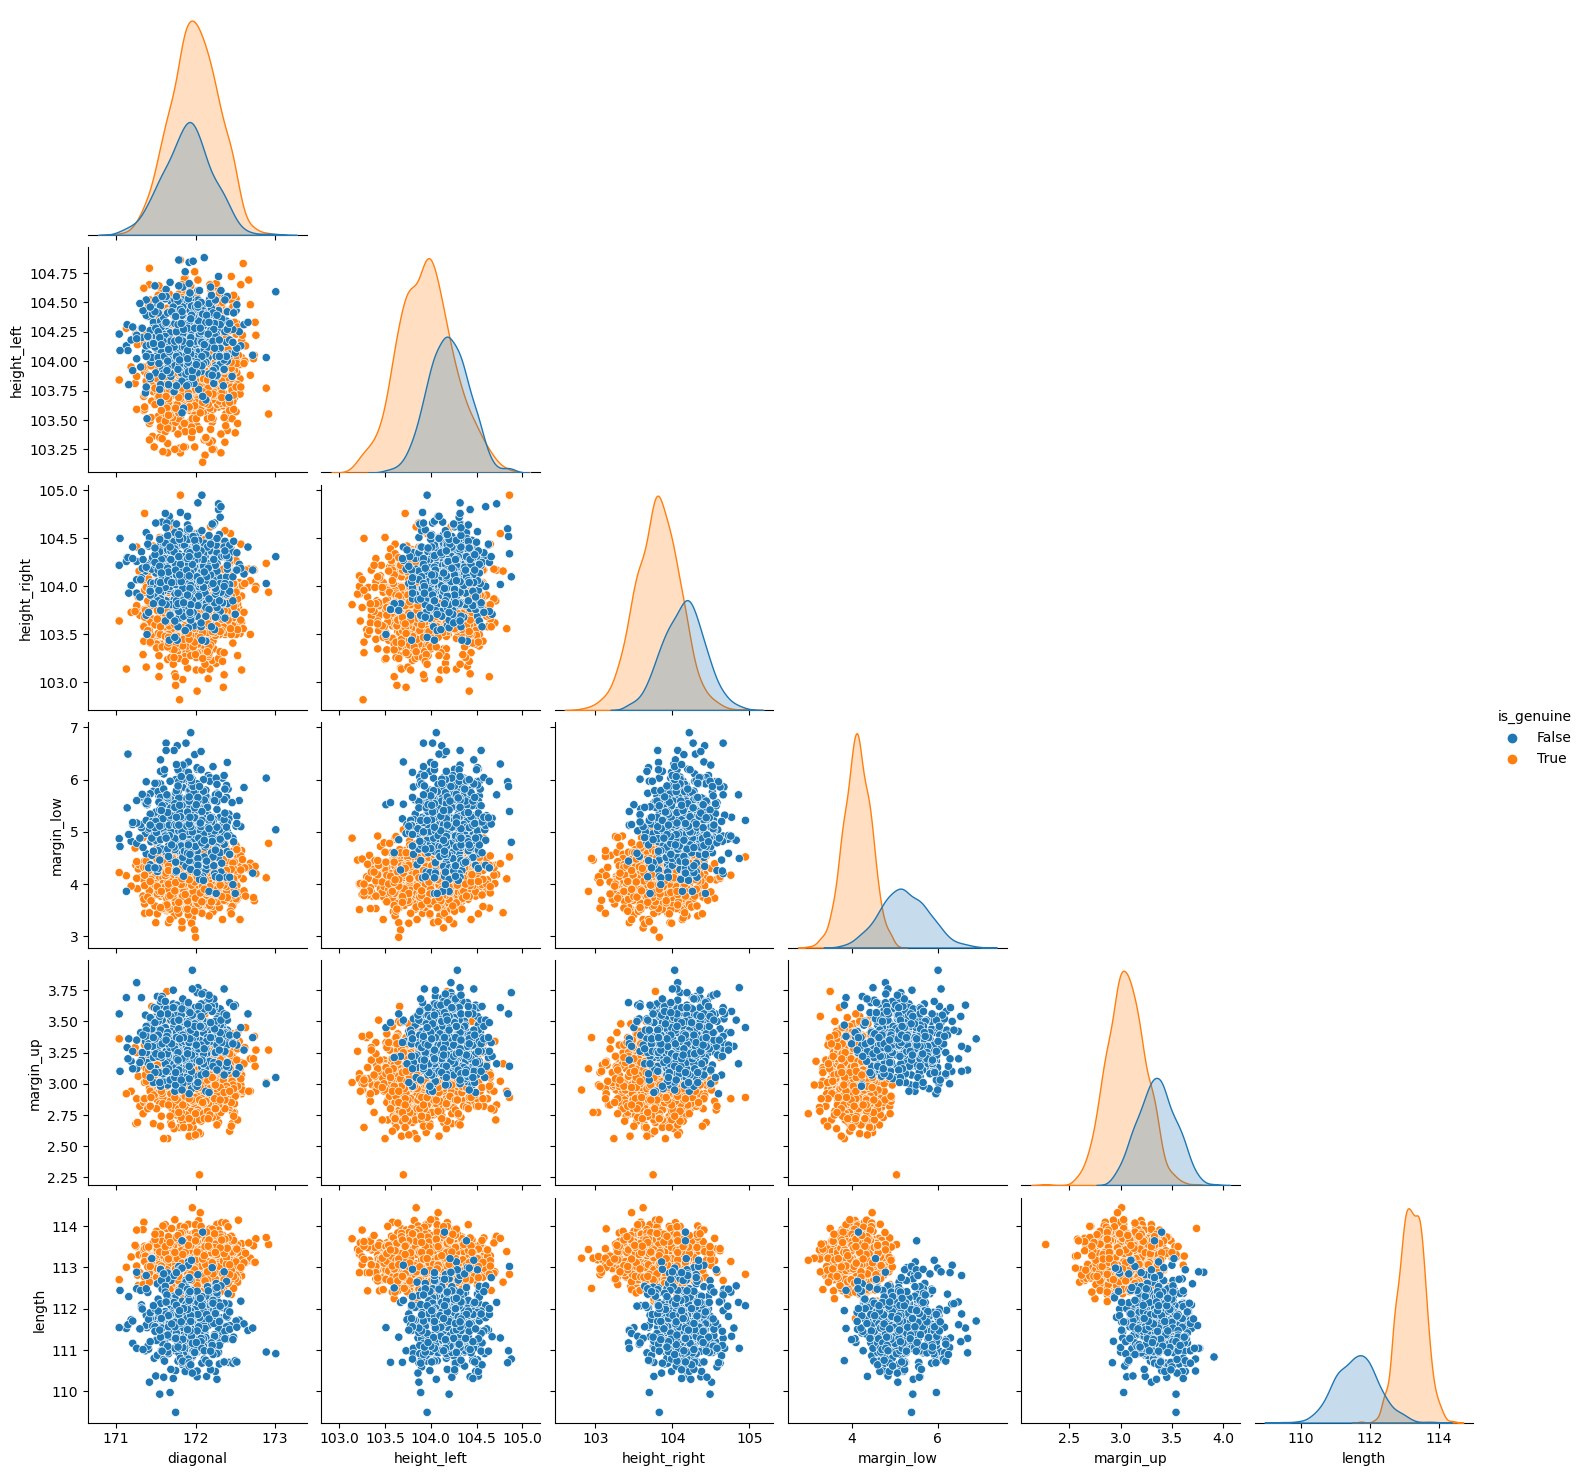

In [14]:
# pairplot sur billets
sns.pairplot(billets,hue='is_genuine',corner=True)

**Les vrais et faux billets se confondent, on le voit avec la superposition de chacune des représentations graphiques. Il y a peut etre des valeurs suspectes à verifier.**

## Répartition des billets par nature (Pie chart)

In [15]:
# Piechart de la répartition
fig = px.pie(billets, names = 'is_genuine', title = "Répartion des billets")
fig.update_traces(textinfo='value+label+percent', textfont_size=20)
fig.show("notebook_connected")

## Dissociation du df en deux parties

### Dataframe des valeurs manquantes

In [16]:
# Création du df uniquement avec valeurs manquantes
billets_nan = billets[billets.isnull().any(axis=1)]
billets_nan.shape

(37, 7)

### Dataframe sans valeurs manquantes

In [17]:
# Création du df sans valeurs manquantes
billets_withoutnan = billets.dropna(how='any')
billets_withoutnan.shape

(1463, 7)

In [18]:
# Vérifications du df
billets_withoutnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


# Régréssion linéaire multiple

In [9]:
# Permet de modéliser la relation entre une variable dépendante et plusieurs variables indépendantes. 

In [10]:
# L'objectif est de minimiser la somme des carrés des résidus pour estimer les coefficients 
# et modéliser la relation entre les variables.

In [19]:
#Regression linéaire multiple 
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_withoutnan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.75e-299
Time:                        11:54:54   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

### Suppréssion des variables non significatives

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le 𝑅2 vaut environ 0.62, et le 𝑅2 ajusté est d'environ 0.61.

Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de ces 𝑅2 

##### Les variables selon leurs p-valeur  qui vont être retirées

- length 0.868  
- diagonal 0.716  
- height_right 0.484  
- height_left 0.468

In [20]:
# Suppréssion des variables non significatives            
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_withoutnan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.24e-304
Time:                        11:54:54   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

**On remarque qu'à présent, tous les paramètres sont significatifs. Quant au 𝑅2 , il vaut environ 0.617, tout comme le 𝑅2 ajusté.**

**On peut donc utiliser ce modèle à des fins de prévision.**

In [149]:
# Un R2 de 0.617 signifie que le modèle explique environ 62% de la variabilité de la variable dépendante par les variables
# indépendantes incluses dans le modèle. 
# En d'autres termes, environ 62% de la variation dans la variable que vous essayez de prédire est capturée par votre modèle.
# Pour interpréter cela, on peut dire que c'est un R2 relativement élevé.

## Résultat d'analyse

Nous allons ici réaliser les tests à un niveau $\alpha=5$% :

In [21]:
# tests a univeau de  𝛼 = 5%
alpha = 0.05

# Number of individuals
n = billets_withoutnan['margin_low'].count()

# Number of variables
p = 3

analysis = pd.DataFrame({'obs':np.arange(1, n+1)})

Récupérons $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé  analyses.

In [22]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

## Calculez les leviers  
  
  
L'effet de levier est une mesure de la distance qui sépare les valeurs des variables indépendantes d'une observation de celles des autres observations.   
  
  
On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [150]:
# Le calcul des leviers permet d'identifier les facteurs clés qui influent le plus sur un résultat. 
# afin d'améliorer la performance globale et prendre des décisions plus éclairées.

In [23]:
# Calcul des leviers
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

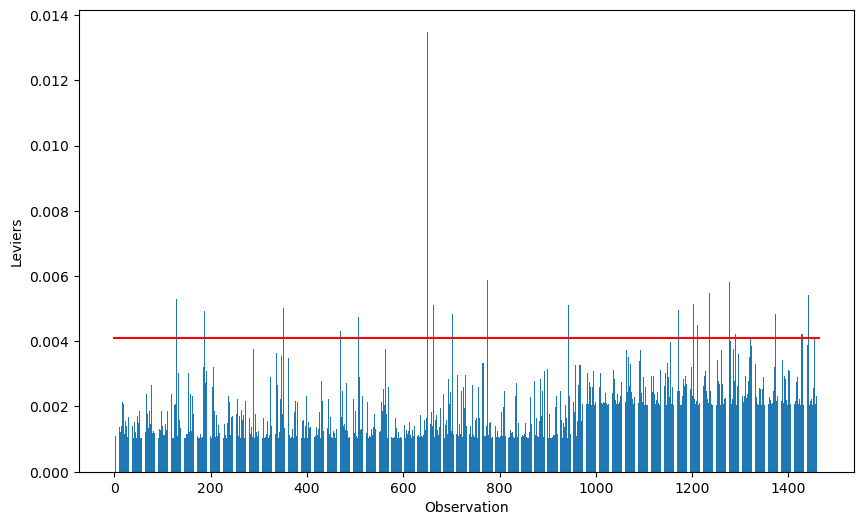

In [24]:
# graphique des leviers
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

In [1]:
# Avec un seuil de levier fixé à 0.004 nous voyont apparaitre des outliers.

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [25]:
# seuil des leviers
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
123,124,0.005865
...,...,...
1441,1442,0.005428
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796


## Les résidus studentisés
  
Les résidus studentisés sont une mesure importante pour évaluer la qualité d'ajustement d'un modèle statistique et identifier les observations qui pourraient avoir un impact disproportionné sur les résultats.  
  
Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [151]:
# Les résidus studentisés sont des résidus ajustés pour prendre en compte la variabilité des données. 
# Ils sont utiles dans l'analyse de régression pour détecter les observations influentes et évaluer la validité des hypothèses
# du modèle, telle que la normalité des résidus. 
# Les résidus studentisés sont obtenus en divisant les résidus bruts par leur écart type estimé, 
# ce qui les standardise. 
# Ils sont souvent utilisés avec un seuil de 2 en valeur absolue pour identifier les observations potentiellement influentes.

In [26]:
# Analyses des résidus
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

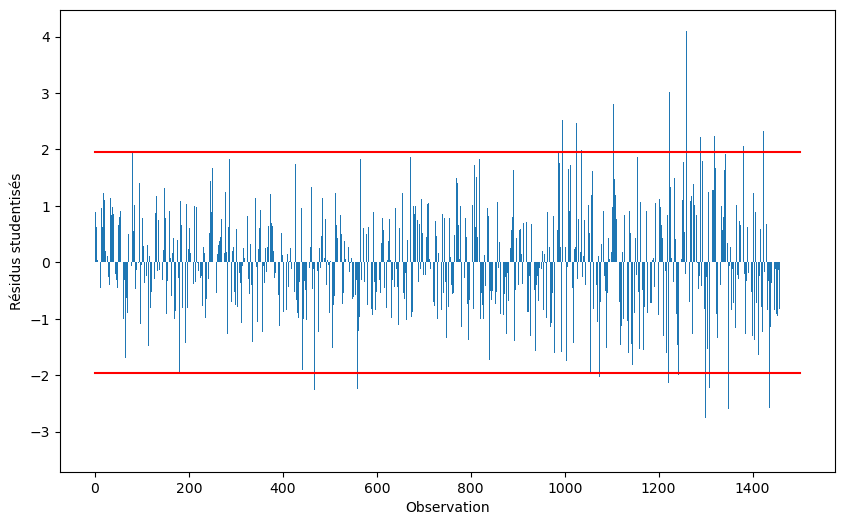

In [27]:
# graphiques des résidus
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## Déterminez la distance de Cook  

In [152]:
# La distance de Cook est une mesure utilisée en analyse de régression 
# pour évaluer l'influence de chaque observation sur les résultats du modèle. 
# Elle mesure à quel point les estimations des coefficients seraient modifiées si une observation était exclue du modèle. 
# Une distance de Cook élevée indique une influence significative de l'observation sur le modèle.

In [28]:
# Calcul de la distance de cook
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [29]:
# Analyses de la distance de cook
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter les observations influentes comme ceci :

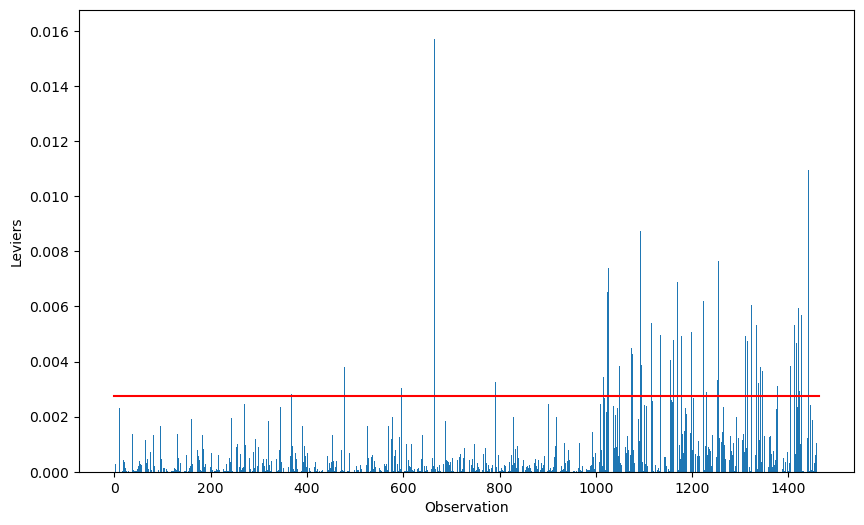

In [30]:
# Graphique de cook
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

## Vérifier la colinéarité des variables  
  
La colinéarité se produit lorsque l'une des variables indépendantes peut être prédite de manière linéaire à partir d'une combinaison linéaire des autres variables indépendantes.  
Cela peut causer des problèmes dans l'analyse de régression et affecter l'interprétation des coefficient.  

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [31]:
# Calcul des variable de colinarité
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.  
Nous appelont cela une colinéarité quasi-parfaite.

## Tests d’homoscédasticité  

In [153]:
# On se réfère à l'idée que la variance des résidus d'un modèle de régression est constante 
# pour toutes les valeurs de la variable dépendante. En d'autres termes,
# l'écart-type des résidus devrait être constant à tous les niveaux de la variable prédite.

Pour diagnostiquer l'homoscédasticité, on peut effectuer des analyses graphiques ou statistiques, telles que :

**Graphiques de résidus :** Représenter graphiquement les résidus par rapport à la variable prédite. Un schéma régulier dans la dispersion des résidus peut indiquer une violation de l'homoscédasticité.

**Test de Breusch-Pagan :** Ce test statistique peut être utilisé pour formellement évaluer l'homoscédasticité.  
Il teste l'hypothèse nulle selon laquelle la variance des résidus est constante.

In [3]:
# Si p-value ≤ 0,05 :   
# On rejette l'hypothèse nulle, indiquant une violation de l'homoscédasticité (présence d'hétéroscédasticité).  

# Si p-value > 0,05 :   
# On ne peut pas rejeter l'hypothèse nulle, suggérant que l'homoscédasticité peut être considérée comme présente.

In [32]:
# résultat du test de Breusch Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


In [4]:
# p-value > 0,05 :   
# On ne peut pas rejeter l'hypothèse nulle, suggérant que l'homoscédasticité peut être considérée comme présente.

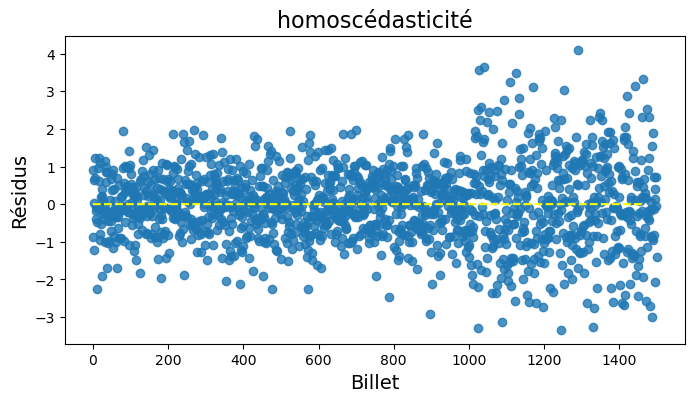

In [33]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=billets_withoutnan.index, y=analyses['rstudent'], alpha=0.8)
plt.plot(np.repeat(0, len(billets_withoutnan.index)+2), color='yellow', linestyle='--')

plt.ylabel('Résidus', fontsize=14)
plt.xlabel('Billet', fontsize=14)
plt.title('homoscédasticité', fontsize=16)
plt.show()

La p-valeur ici n'est pas inférieure à $5$%, on ne rejette pas l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

## Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.  

On analyse la distribution des résidus avec un test de normalité et on calcul sa moyenne

In [34]:
# test de Shapiro
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

In [6]:
# Plus la statistique de test est proche de 1, plus les données sont conformes à une distribution normale. 
# Dans notre cas, 0.9936 indique une certaine proximité avec une distribution normale.

# si la p-value est inférieure à un seuil de signification (par exemple, 0.05), on rejette l'hypothèse nulle.

**En résumé, les résultats suggèrent que les données ne suivent pas une distribution normale.  
Cependant, il est important de noter que le rejet de l'hypothèse de normalité**

In [35]:
print('Moyenne des résidus',reg_multi.resid.mean())

Moyenne des résidus 1.7223254796235512e-15


Le test nous indique que les résidus ne suivent pas une loi normale.  
pvalue < 0.05

In [36]:
# Analyses des résidus
analyses['residu_s'] = reg_multi.resid

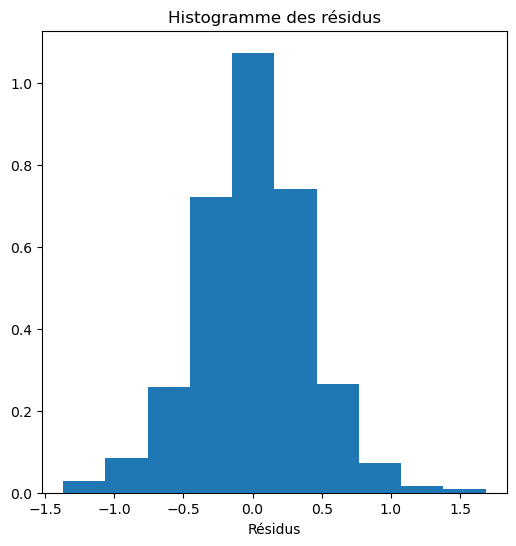

In [37]:
# Historigramme des résidus
plt.figure(figsize=(6,6))
plt.hist(analyses['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

### QQ plot ou quantile-quantile plot ( diagramme quantile-quantile)  

In [7]:
# Un QQ plot (Quantile-Quantile plot) permet de comparer visuellement la distribution des données
# à une distribution théorique, souvent la distribution normale.

In [38]:
import statsmodels.api as sm

<Figure size 800x800 with 0 Axes>

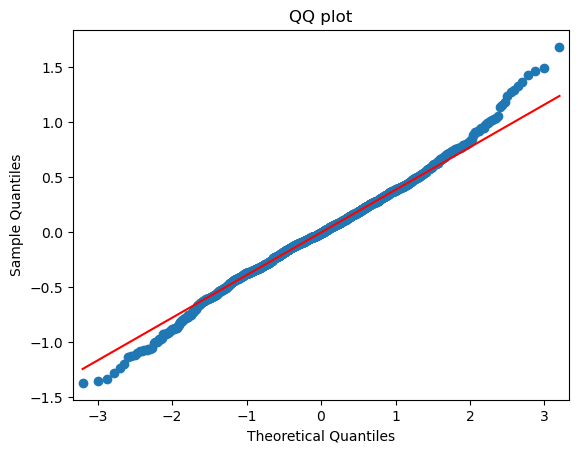

In [39]:
# Création d'un QQ-plot
plt.figure(figsize=(8,8))
fig = sm.qqplot(reg_multi.resid, line='q')
plt.title('QQ plot')
plt.show()

In [8]:
# Les points alignés le long de la diagonale suggèrent une bonne correspondance avec la distribution théorique.

**Malgré une homoscédasticité, le modèle linéaire est robuste et mon fichier contient plus de 30 individus.**

Sources :
http://perso.ens-lyon.fr/lise.vaudor/non-respect-des-hypotheses-du-modele-lineaire-anova-regression-cest-grave-docteur/

# Prédiction en appliquant la régression linéaire mutliple

In [40]:
# df uniquement remplit de valeurs null
billets_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [41]:
# création d'un df sans margin_low
X_nan = billets_nan.drop(['margin_low'], axis=1)

In [42]:
# création d'un df de prédiction
y_nan = reg_multi.predict(X_nan)

In [43]:
# remplacement des valeurs nulls par la prédiction
X_nan['margin_low'] = y_nan
X_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.074248
99,True,171.93,104.07,104.18,3.14,113.08,4.097561
151,True,172.07,103.80,104.38,3.02,112.93,4.122994
197,True,171.45,103.66,103.80,3.62,113.27,3.995830
241,True,171.83,104.14,104.06,3.02,112.36,4.122994


In [44]:
# vérification des colonnes remplacées
X_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     bool   
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_up     37 non-null     float64
 5   length        37 non-null     float64
 6   margin_low    37 non-null     float64
dtypes: bool(1), float64(6)
memory usage: 2.1 KB


In [45]:
# vérification du df sans les valeurs nulls
billets_withoutnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [46]:
# Ajouter les lignes qui ont remplacé les valeurs nulles
billets = pd.concat([billets_withoutnan, X_nan])

In [47]:
# vérification du df aprés concaténation
billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


## analyse univariée

In [48]:
# Analyses des différences Faux et vrais billets
target = billets[['is_genuine']]

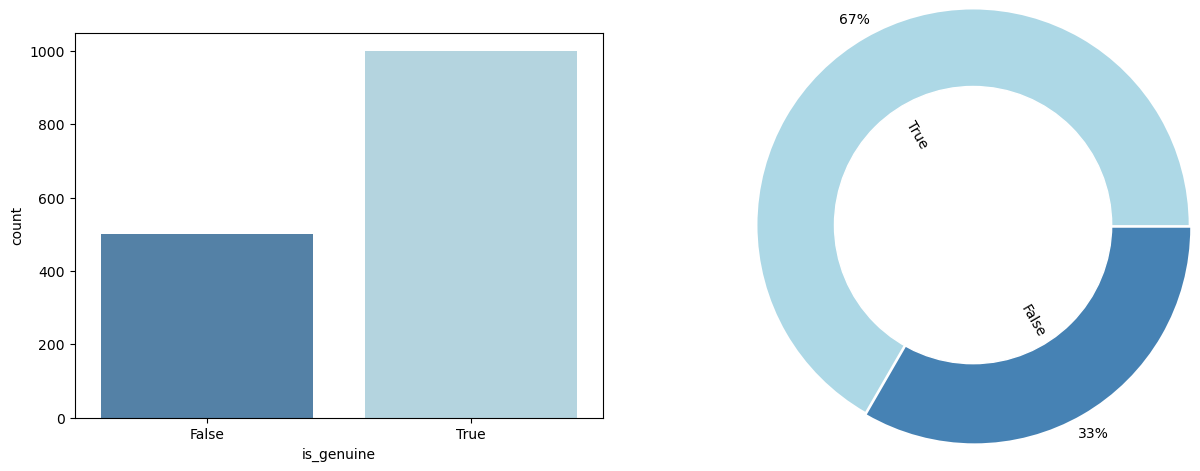

In [49]:
# Graphique présentant les différences
palette =["steelblue","lightblue",]
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x="is_genuine", data=target, palette = palette)
plt.subplot(122)
target["is_genuine"].value_counts().plot(kind="pie", ylabel='', 
                                       autopct='%1.0f%%', radius=1.4, 
                                       explode = (0, 0.02), 
                                       colors=["lightblue","steelblue"], 
                                       pctdistance=1.1, labeldistance=0.4, 
                                       rotatelabels=True)
circle = plt.Circle( (0,0), 0.9, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

**Un tiers des billets sont faux.**

## Boxplot  avec les valeurs manquante remplacées

<Axes: xlabel='is_genuine', ylabel='margin_low'>

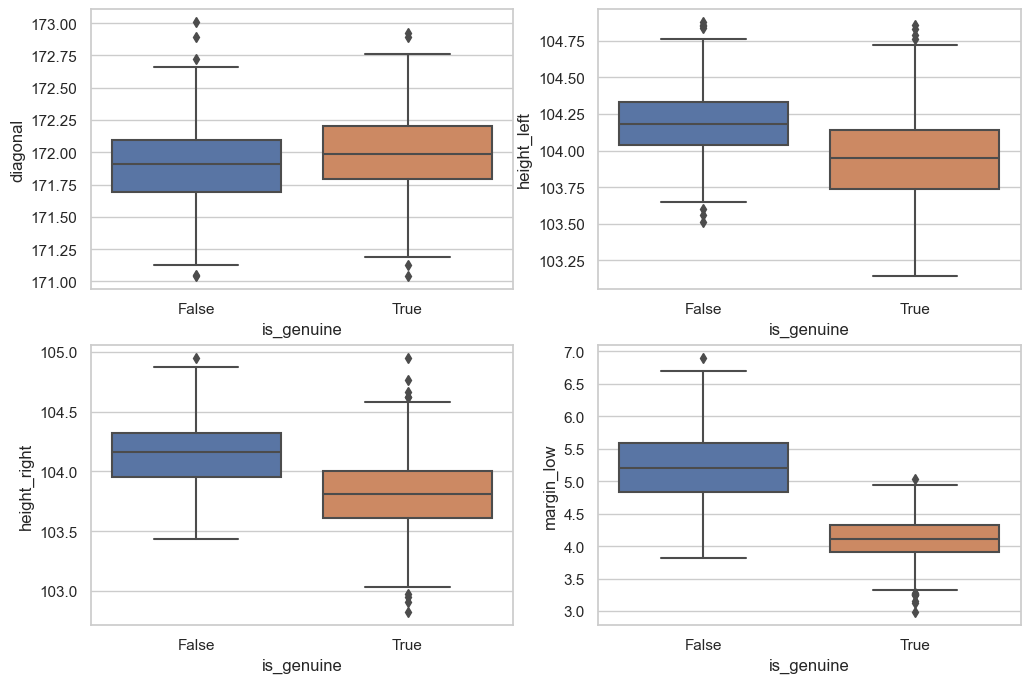

In [50]:
# Afficher des boxplot

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,y='diagonal',x='is_genuine')
plt.subplot(222)
sns.boxplot(data=billets, y='height_left',x='is_genuine')
plt.subplot(223)
sns.boxplot(data=billets, y='height_right',x='is_genuine')
plt.subplot(224)
sns.boxplot(data=billets,y='margin_low',x='is_genuine')

<Axes: xlabel='is_genuine', ylabel='length'>

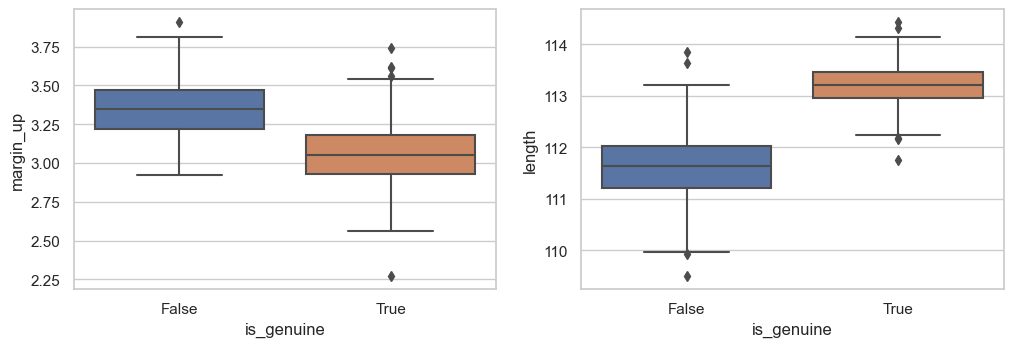

In [51]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,  y='margin_up',x='is_genuine')
plt.subplot(222)
sns.boxplot(data=billets,  y='length',x='is_genuine')

## ACP (Analyse en composantes principales)  
On réalise une analyse en composantes principales pour réduire les 6 variables et représenter nos billets dans un espace à 2 dimensions.

### Préparation des données pour l'ACP

In [52]:
# df sans is_genuine
X = billets.drop(columns= ['is_genuine'])
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [53]:
# df avec uniquement is_genuine
y = billets['is_genuine']
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

In [54]:
# Centrage et Réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.0562999 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08070259, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1256205 , -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.02828427,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.04434939,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  1.14716614,  0.38201544,
        -1.36227312]])

### Calcul des composantes principales

In [55]:
# Nombre de composantes souhaitées
n_comp = 6

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [56]:
# Définition de la fonction pour le graphique Éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

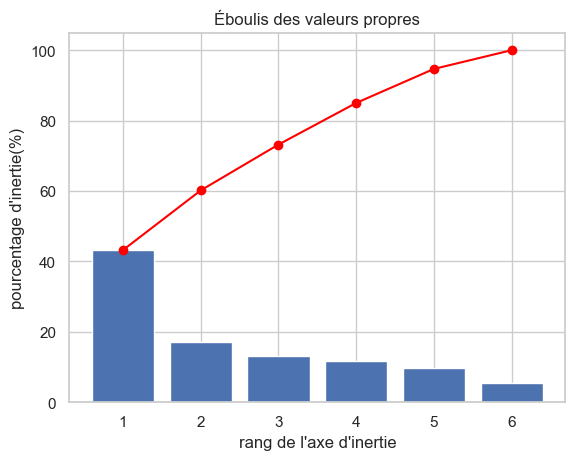

In [57]:
# graphique de l'éboulis des valeurs propres
display_scree_plot(pca)
plt.show()

Je choisis 2 composantes principales, car les 2 premières dimensions représentent 60% des informations importantes.On va s'intéresser aux axes F1 et F2.

### Cercle des corrélations 

In [58]:
# Définition de la fonction pour le graphique Cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''
    Display a scatter plot on a factorial plane, one for each factorial plane

    Parameters :
        X_projected : model_pca.transform(X_scaled)
        n_comp (float) : the number of components
        pca : the result of instantiate of PCA in scikit learn
        axis_rank : the rank of the axis to visualize
        labels : labels of our variables
    '''
    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialize the matplotlib figure      
            #fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            #plt.show(block=False)
            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))

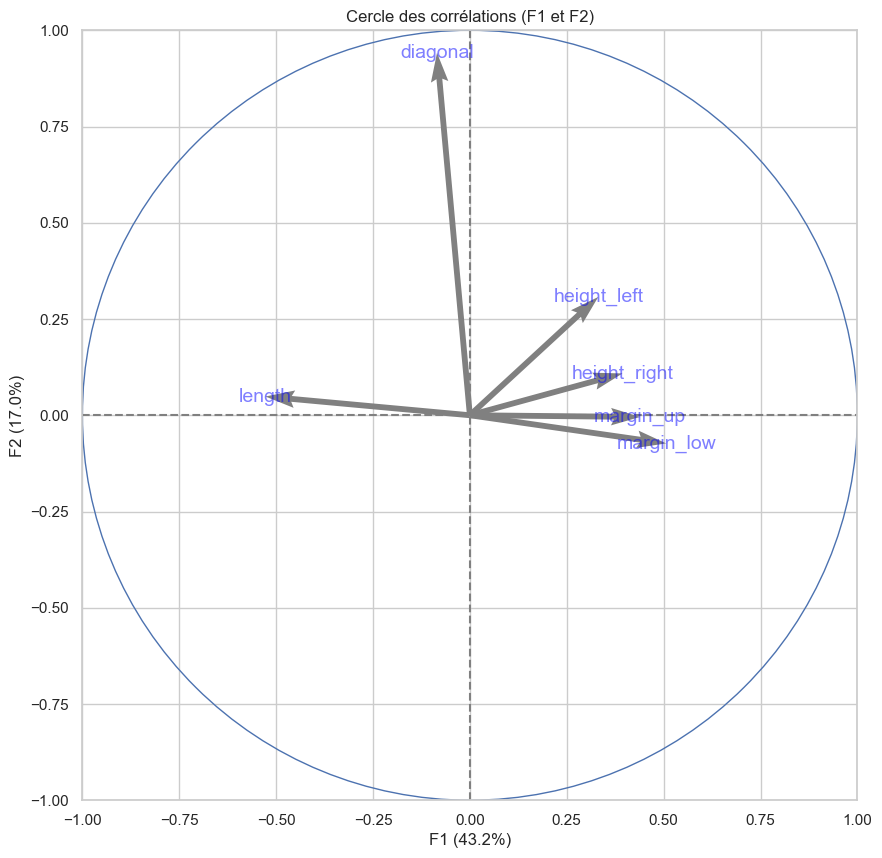

In [59]:
# Générer le Cercle des corrélations F1 et F2.
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(X.columns))

**- Avec le cercle des corrélations F1-F2 (la projection de la flèche sur F1 correspond au coefficient de corrélation ), on peut trouver des variables qui sont bien corrélées aux composantes principales:**  
- Les variables les plus corrélées positivement à F1 sont 'height' et 'margin'
- Les variables les plus corrélées  négativement à F1 est 'length'
- Les variables les plus corrélées positivement à F2 est 'diagonal'

# Algorithmes Kmeans & Régréssion Logistique 

## Split dés données

Avec la fonction 'train_test_split' on découpe nos données en deux parties :   
80% pour l'entrainement du modèle  
20% pour les tests

In [118]:
# Base d'apprentissage et base de test

#valeurs caractéristiques et valeur cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']].values
y = billets['is_genuine']
y=y.astype('int')


#fraction de la df 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=40,stratify = y)

In [120]:
X_test.shape

(375, 6)

In [121]:
y_test.shape

(375,)

In [122]:
X_train.shape

(1125, 6)

**On va entrainner le model sur 80% des données et faire les tests sur 20%.**

## K-means  

L'algorithme K-means est une technique de clustering largement utilisée en apprentissage automatique et en analyse de données. 
L'objectif du K-means est de diviser un ensemble de données en groupes (clusters) en fonction de leurs similarités.   
Chaque cluster est caractérisé par son centroïde, qui est la moyenne des observations dans le cluster.

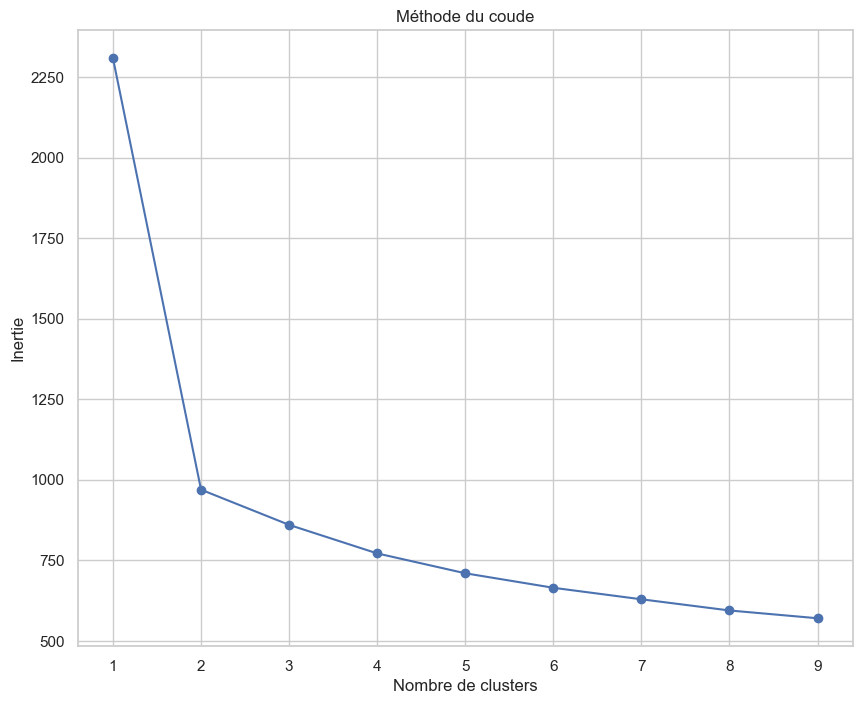

In [123]:
# effectuer une classification par K-mean

#initialiser une liste vide appelée "inertias" qui sera utilisée pour stocker les valeurs d'inertie pour chaque cluster
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 8)) # définit la taille de la figure
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

### Le clustering se fera sur les prédictions

In [124]:
# Nombre de clusters souhaités
n_clusters = 2

In [125]:
# Clustering par K-means
kmeans = KMeans(random_state=40, n_clusters=2, n_init=10)

In [126]:
# entrainement du kmeans sur X_train
kmeans.fit(X_train)

KMeans(n_clusters=2, n_init=10, random_state=40)

In [127]:
# Création du df de préduction Kmeans
pred_km = kmeans.predict(X_test)
pred_km = abs(pred_km-1)
pred_km

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [128]:
# Calcul des centroïdes
centroids = scaler.transform(kmeans.cluster_centers_)
centroids

array([[ 0.10122158, -0.26214854, -0.32316393, -0.54011036, -0.42438089,
         0.59751052],
       [-0.21434522,  0.52193956,  0.69009121,  1.14241074,  0.86139485,
        -1.28197424]])

### Projection des individus sur le plan factoriel F1 et F2 par cluster

In [129]:
# Fit the model with the data
X_reduced = pca.transform(scaler.transform(X_test))

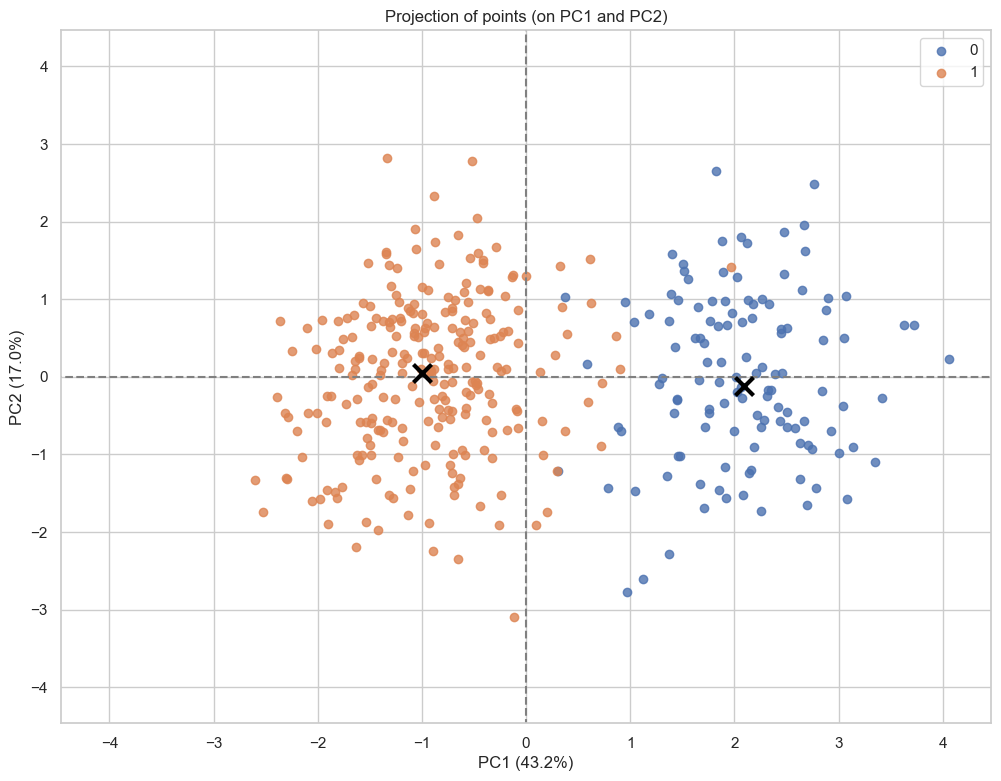

In [130]:
# graphique de la projection et des centroides
centres_reduced = pca.transform(centroids)
plt.figure(figsize=(12,9))
display_factorial_planes(X_reduced, 2, pca, [(0,1)], 
                         illustrative_var = pred_km, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.show()

### Matrice de confusion K- means

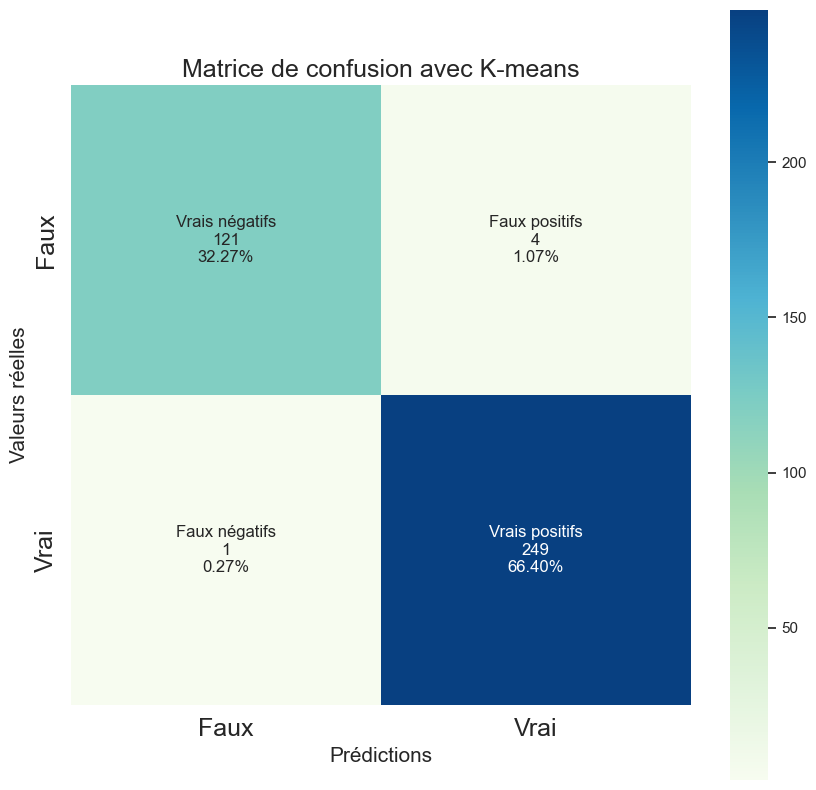

In [131]:
# confusion matrix
matrix_km = confusion_matrix(y_test, pred_km)

names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_km.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_km.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_km, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Prédictions', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec K-means', size=18)

plt.show()

In [145]:
# Vrai positif est un résultat correct qui confirme la présence.
# Vrai négatif est un résultat correct qui confirme l'absence.

# Faux positif indique quelque chose qui n'est pas présent.
# Faux négatif indique l'absence de quelque chose qui est réellement présent. 

Vrais positifs : 249  / 66.40%  
Vrais négatifs : 121 / 32.27 %  
Faux positifs : 4 / 1.07%    
Faux négatifs : 1  / 0.27%  

Donc nous avons 4 vrais billets détectés comme un faux, et 1 faux billet détecté comme vrai billet.

In [132]:
matrix_km

array([[121,   4],
       [  1, 249]], dtype=int64)

### Classification report

In [133]:
# évaluer la performance du modèl Kmeans

In [146]:
print(classification_report(y_test,pred_km))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       125
           1       0.98      1.00      0.99       250

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.98       375
weighted avg       0.99      0.99      0.99       375



Le rapport  nous aide à mieux comprendre comment on été interprétés les résultats obtenus.   
On observe d'ailleurs une exactitude des résultats à hauteur de 98% (accuracy).  
("Accuracy score" est utilisé pour mesurer les performances du modèle en termes de ratio de la somme des vrais positifs et des vrais négatifs sur l'ensemble des prédictions effectuées.)

### Réalisation du KNN ( le plus proche voisin)

In [76]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn import neighbors

In [77]:
# Création du modèle
KNN = Knn().fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

In [78]:
# Prédiction
y_pred_knn = KNN.score(X_test,y_test)
print(y_pred_knn)

0.9946666666666667


In [79]:
print((y_pred_knn)*100,'%')

99.46666666666667 %


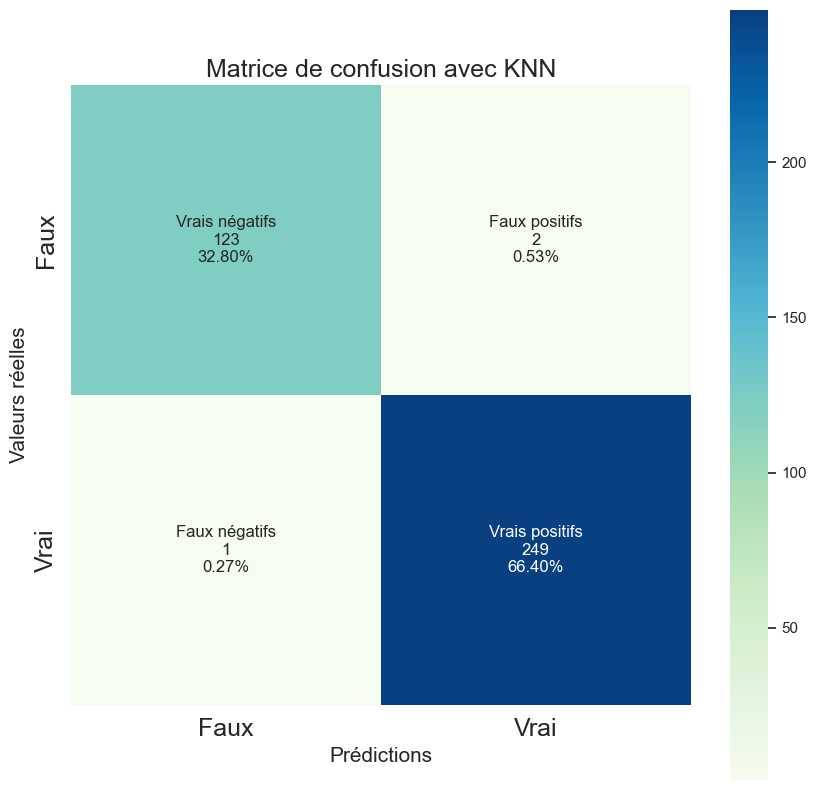

In [158]:
# confusion KNN
matrix_knn = confusion_matrix(y_test, KNN.predict(X_test))

names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_knn.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_knn.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_knn, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Prédictions', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec KNN', size=18)

plt.show()

Vrais positifs : 240  / 64.00%  
Vrais négatifs : 133 / 35.47 %  
Faux positifs : 2 / 0.53%    
Faux négatifs : 0  / 0.00% 

Donc nous avons 2 vrais billets détectés comme un faux, et 0 faux billet détecté comme vrai billet.

# Régression logistique   
  
Technique statistique utilisée pour modéliser la relation entre une variable dépendante binaire (à deux catégories) et un ensemble de variables indépendantes.  
  
L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives).

###  Création du modèl de régression logistique

In [137]:
# alternative proposee 
from sklearn import linear_model
#instanciation du modèle
model_logit = linear_model.LogisticRegression(random_state = 40,solver='liblinear')

#training
model_logit.fit(X_train,y_train)

#précision du modèle
pred_logi = model_logit.score(X_test,y_test)
print(pred_logi*100)

98.66666666666667


### Prédictions

In [138]:
# Création du df de préduction logistique
pred_logi = model_logit.predict(X_test)
pred_proba = model_logit.predict_proba(X_test)[:,1]

In [139]:
pred_proba.round(2)

array([0.  , 0.97, 0.9 , 0.99, 1.  , 1.  , 1.  , 1.  , 0.99, 0.98, 0.  ,
       0.98, 0.98, 1.  , 0.99, 0.33, 0.  , 0.  , 1.  , 0.98, 0.99, 0.01,
       1.  , 0.99, 0.  , 0.03, 0.82, 0.96, 0.  , 1.  , 0.96, 0.  , 0.97,
       0.99, 1.  , 0.99, 1.  , 0.  , 0.99, 0.97, 0.99, 0.97, 0.02, 0.  ,
       1.  , 1.  , 0.99, 1.  , 0.97, 0.99, 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 1.  , 1.  , 0.99, 0.  , 1.  , 1.  , 0.86, 0.01, 0.99,
       0.  , 0.89, 0.  , 1.  , 0.94, 1.  , 1.  , 0.  , 1.  , 1.  , 0.75,
       1.  , 0.97, 1.  , 0.98, 0.99, 0.02, 0.75, 0.  , 1.  , 1.  , 0.98,
       0.  , 0.01, 0.99, 1.  , 0.99, 1.  , 1.  , 0.09, 0.02, 0.03, 0.41,
       0.99, 0.  , 1.  , 0.99, 1.  , 0.  , 0.  , 1.  , 0.21, 0.97, 0.14,
       0.  , 1.  , 0.02, 0.99, 0.93, 1.  , 0.  , 0.06, 0.99, 0.  , 0.99,
       0.28, 0.  , 0.  , 0.99, 0.97, 0.99, 0.  , 0.01, 0.99, 0.05, 1.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.99, 1.  , 1.  , 0.  , 0.97, 1.  ,
       0.98, 0.99, 0.  , 1.  , 0.99, 1.  , 1.  , 0.

### Matrice de confusion (régression logistique)

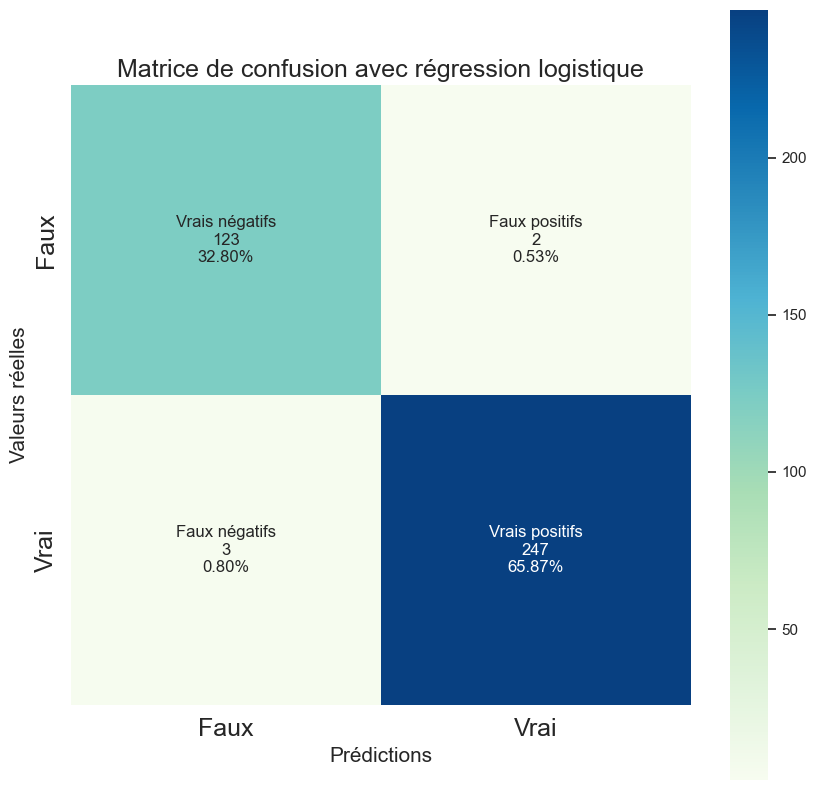

In [140]:
# confusion matrix
matrix_km = confusion_matrix(y_test, pred_logi)

names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_km.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_km.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_km, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Prédictions', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec régression logistique', size=18)

plt.show()

In [144]:
# Vrai positif est un résultat correct qui confirme la présence.
# Vrai négatif est un résultat correct qui confirme l'absence.

# Faux positif indique quelque chose qui n'est pas présent.
# Faux négatif indique l'absence de quelque chose qui est réellement présent. 

Vrais positifs : 239  / 63.73%  
Vrais négatifs : 133 / 35.47 %  
Faux positifs : 2 / 0.53%    
Faux négatifs : 1  / 0.27%  

Donc nous avons 2 vrais billets détectés comme un faux, et 3 faux billets détectés comme vrais billets.

### classification_report

In [143]:
print(classification_report(y_test,pred_logi))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.99      0.99      0.99       250

    accuracy                           0.99       375
   macro avg       0.98      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



## Conclusion et choix du model

In [106]:
from pandas import Series,DataFrame

In [156]:
df = {'Accuracy': {'K-means':0.99, 'Régression logistique': 0.99},
        'Recall':{'K-means':0.97, 'Régression logistique': 0.99},
      'f1-score':{'K-means':0.98, 'Régression logistique': 0.99}}
score = DataFrame(df)

In [157]:
score

,Accuracy,Recall,f1-score
K-means,0.99,0.97,0.98
Régression logistique,0.99,0.99,0.99


###### Les set de données analysé contiennent pour les deux algorythmes 400 échantillons.
- Regression logistique  
- Kmeans   
 Ils renvoient tous les deux de très bon resultats mais la prédictions de  vrai faux dans la régréssion logisitique est plus précise.

## Courbe de ROC

La courbe ROC (Receiver Operating Characteristic) est un outil graphique pour évaluer les performances d'un modèle de classification.  
  
  
Représentation graphique des performances d'un modèle de classification binaire pour tous les seuils de classification

In [94]:
# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# Calculez l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

In [95]:
for fp, tp, th in zip(fpr, tpr, thresholds):
    print("fp : {} - tp : {} - seuil : {}".format(fp.round(2), tp.round(2), th.round(2)))

fp : 0.0 - tp : 0.0 - seuil : inf
fp : 0.0 - tp : 0.0 - seuil : 1.0
fp : 0.0 - tp : 0.95 - seuil : 0.93
fp : 0.01 - tp : 0.95 - seuil : 0.93
fp : 0.01 - tp : 0.99 - seuil : 0.78
fp : 0.01 - tp : 0.99 - seuil : 0.74
fp : 0.01 - tp : 1.0 - seuil : 0.69
fp : 0.04 - tp : 1.0 - seuil : 0.35
fp : 0.04 - tp : 1.0 - seuil : 0.31
fp : 1.0 - tp : 1.0 - seuil : 0.0


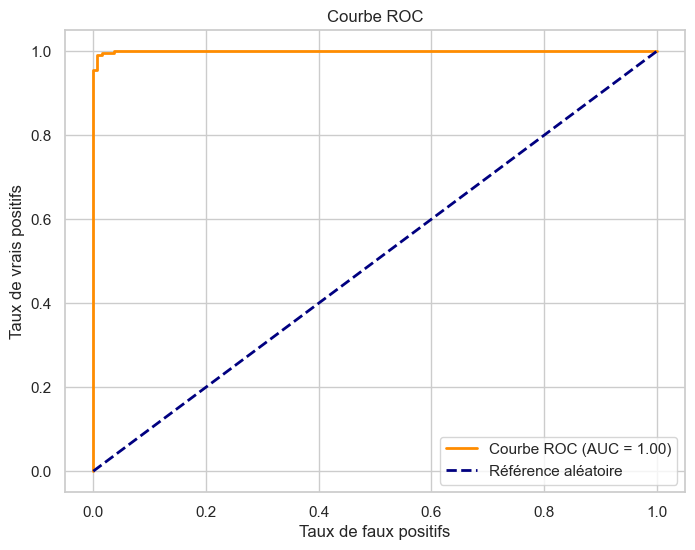

In [96]:
# Affichez la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Référence aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

**Avec un AUC de 1.00 nous avons une trés bonne performance.**

# Enregistrement du model

# Import fichier test
test = pd.read_csv('billets_production.csv')
test.head()

# Je crée une première fonction qui va me permettre de tester mon fichier avec les deux algorithmes
def test_billet(test) : 
    
    # Je crée une copie 
    X_final = test.iloc[:,:-1]
       
    # J'applique la prédiction par regression logistique
    res = model_logit.predict(X_final.values)
    res_proba = model_logit.predict_proba(X_final.values)[:,1]
    
    # Je crée une liste dans laquelle j'indique que si la valeur de i est supérieure à 0.78 il prendra la valeur de True
    predict=[]
    for i in res_proba:
        if i >= 0.78 : predict.append(True)
        else : predict.append(False)
    
    # Je crée un colonne qui affiche la prédiction en % et une autre qui affiche la réponse
    test["prediction_% relog"]=res_proba
    test["Réponse reglog"]=predict  

    return(test[["id", "prediction_% relog", "Réponse reglog"]].set_index('id'))

print(test_billet(test))